In [210]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguedashlineups
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.endpoints import teamdashlineups
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [171]:
def LineupData(season,per):
    tempdf1 = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Base', 
                                                 season = season, 
                                                 per_mode_detailed = per).get_data_frames()[0]
    tempdf2 = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Advanced', 
                                                 season = season, 
                                                 per_mode_detailed = per).get_data_frames()[0]
    tempdf = pd.merge(tempdf1,tempdf2[['GROUP_ID','PIE','OFF_RATING','E_OFF_RATING','DEF_RATING','E_DEF_RATING']].copy(), on='GROUP_ID', how='outer')
    return(tempdf)

In [172]:
# def LineupData1(teamid,season,per):
#     tempdf1 = teamdashlineups.TeamDashLineups(teamid,
#                                               measure_type_detailed_defense = 'Base', 
#                                                  season = season, 
#                                                  per_mode_detailed = per).get_data_frames()[0]
#     tempdf2 = teamdashlineups.TeamDashLineups(teamid,
#                                               measure_type_detailed_defense = 'Advanced', 
#                                                  season = season, 
#                                                  per_mode_detailed = per).get_data_frames()[0]
#     tempdf = pd.merge(tempdf1,tempdf2[['GROUP_ID','PIE']].copy(), on='GROUP_ID', how='outer')
#     return(tempdf)

In [173]:
# nba_teams = teams.get_teams()

# # Select the dictionary for the Pacers, which contains their team ID
# # lakers = [team for team in nba_teams if team['abbreviation'] == 'LAL'][0]
# # lakers_id = lakers['id']
# # print(f'lakers_id: {lakers_id}')
# season = '2017-18'
# per = 'Per100Possessions'

# tempdf1 = teamdashlineups.TeamDashLineups(1610612737,
#                                               measure_type_detailed_defense = 'Base', 
#                                                  season = season, 
#                                                  per_mode_detailed = per).get_data_frames()[0]
# print(tempdf1.head())
# tempdf2 = teamdashlineups.TeamDashLineups(1610612737,
#                                               measure_type_detailed_defense = 'Advanced', 
#                                                  season = season, 
#                                                  per_mode_detailed = per).get_data_frames()[0]
# tempdf = pd.merge(tempdf1,tempdf2[['GROUP_ID','PIE']].copy(), on='GROUP_ID', how='outer')

# for team in nba_teams[1:]:
#     teamid = team['id']
#     teamdf = LineupData1(teamid,'2017-18','Per100Possessions')
#     tempdf = pd.append(tempdf,teamdf.copy(), on='GROUP_ID', how='outer')
#     time.sleep(5)

# #Combine dataframes for single game
# # df = pd.DataFrame()
# # for date in gamedates[:5]:
# #     print(date)
    
# #     tempdf = teamdashlineups.TeamDashLineups(
# #         lakers_id,date_from_nullable = date, date_to_nullable = date).get_data_frames()[1]
# #     tempdf1 = tempdf[]
# #     print(len(tempdf))
# #     df = df.append(tempdf)
# #     time.sleep(2)
    
# # df.head(20)

# # lakersdf = teamdashlineups.TeamDashLineups(lakers_id, per_mode_detailed = 'Per100Possessions').get_data_frames()[1]
# # lakersdf.head()
# # df1 = lakersdf.iloc[:,0:29]
# # df1 = df1.sort_values('PLUS_MINUS', ascending = False)
# # print(len(df1))
# # df1.head(20)

In [174]:
def PlayerData(season,per):
    tempdf1 = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense = 'Base', 
                                                 season = season, 
                                                 per_mode_detailed = per).get_data_frames()[0]
    tempdf2 = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense = 'Advanced', 
                                                 season = season, 
                                                 per_mode_detailed = per).get_data_frames()[0]
    tempdf = pd.merge(tempdf1,tempdf2[['PLAYER_ID','PIE']].copy(), on='PLAYER_ID', how='outer')
    return(tempdf)
    return(tempdf1)

In [175]:
dfLineup18 = LineupData('2017-18','Per100Possessions')
dfPlayer18 = PlayerData('2017-18','Per100Possessions')

time.sleep(2)

dfLineup17 = LineupData('2016-17','Per100Possessions')
dfPlayer17 = PlayerData('2016-17','Per100Possessions')

time.sleep(2)

dfLineup16 = LineupData('2015-16','Per100Possessions')
dfPlayer16 = PlayerData('2015-16','Per100Possessions')

dfLineup = dfLineup18.append(dfLineup17, ignore_index=True)
dfLineup = dfLineup.append(dfLineup16, ignore_index=True)

dfPlayer = dfPlayer18.append(dfPlayer17, ignore_index=True)
dfPlayer = dfPlayer.append(dfPlayer16, ignore_index=True)

dfLineup = dfLineup18
dfPlayer = dfPlayer18

#dfLineup.head()

In [176]:
print(len(dfLineup))
print(len(dfPlayer))

250
540


In [177]:
for index, row in dfLineup.iterrows():
    playerids = row['GROUP_ID'].split("-")[1:-1]
    teamscore = 0
    for player in playerids:
        playerstats = dfPlayer.loc[dfPlayer['PLAYER_ID'] == int(player)]
        playerscore = playerstats.iloc[0]['AST']
        teamscore = teamscore + playerscore
    dfLineup.at[index,'SUM_AST'] = teamscore     
    
dfLineup['AST_NET'] = dfLineup['AST'] - dfLineup['SUM_AST']

In [178]:
for index, row in dfLineup.iterrows():
    playerids = row['GROUP_ID'].split("-")[1:-1]
    teamscore = 0
    for player in playerids:
        playerstats = dfPlayer.loc[dfPlayer['PLAYER_ID'] == int(player)]
        playerscore = playerstats.iloc[0]['FG_PCT']
        teamscore = teamscore + playerscore
    dfLineup.at[index,'SUM_FG_PCT'] = teamscore     
    
dfLineup['FG_PCT_NET'] = dfLineup['FG_PCT'] - dfLineup['SUM_FG_PCT']/5

In [179]:
for index, row in dfLineup.iterrows():
    playerids = row['GROUP_ID'].split("-")[1:-1]
    teamscore = 0
    for player in playerids:
        playerstats = dfPlayer.loc[dfPlayer['PLAYER_ID'] == int(player)]
        playerscore = playerstats.iloc[0]['FG3_PCT']
        teamscore = teamscore + playerscore
    dfLineup.at[index,'SUM_FG3_PCT'] = teamscore     
    
dfLineup['FG3_PCT_NET'] = dfLineup['FG3_PCT'] - dfLineup['SUM_FG3_PCT']/5

In [180]:
for index, row in dfLineup.iterrows():
    playerids = row['GROUP_ID'].split("-")[1:-1]
    teamscore = 0
    for player in playerids:
        playerstats = dfPlayer.loc[dfPlayer['PLAYER_ID'] == int(player)]
        playerscore = playerstats.iloc[0]['REB']
        teamscore = teamscore + playerscore
    dfLineup.at[index,'SUM_REB'] = teamscore     
    
dfLineup['REB_NET'] = dfLineup['REB'] - dfLineup['SUM_REB']

In [181]:
for index, row in dfLineup.iterrows():
    playerids = row['GROUP_ID'].split("-")[1:-1]
    teamscore = 0
    for player in playerids:
        playerstats = dfPlayer.loc[dfPlayer['PLAYER_ID'] == int(player)]
        playerscore = playerstats.iloc[0]['TOV']
        teamscore = teamscore + playerscore
    dfLineup.at[index,'SUM_TOV'] = teamscore     
    
dfLineup['TOV_NET'] = dfLineup['TOV'] - dfLineup['SUM_TOV']

In [182]:
for index, row in dfLineup.iterrows():
    playerids = row['GROUP_ID'].split("-")[1:-1]
    teamscore = 0
    for player in playerids:
        playerstats = dfPlayer.loc[dfPlayer['PLAYER_ID'] == int(player)]
        playerscore = playerstats.iloc[0]['STL']
        teamscore = teamscore + playerscore
    dfLineup.at[index,'SUM_STL'] = teamscore     
    
dfLineup['STL_NET'] = dfLineup['STL'] - dfLineup['SUM_STL']

In [183]:
for index, row in dfLineup.iterrows():
    playerids = row['GROUP_ID'].split("-")[1:-1]
    teamscore = 0
    for player in playerids:
        playerstats = dfPlayer.loc[dfPlayer['PLAYER_ID'] == int(player)]
        playerscore = playerstats.iloc[0]['PTS']
        teamscore = teamscore + playerscore
    dfLineup.at[index,'SUM_PTS'] = teamscore     
    
dfLineup['PTS_NET'] = dfLineup['PTS'] - dfLineup['SUM_PTS']

In [184]:
for index, row in dfLineup.iterrows():
    playerids = row['GROUP_ID'].split("-")[1:-1]
    teamscore = 0
    for player in playerids:
        playerstats = dfPlayer.loc[dfPlayer['PLAYER_ID'] == int(player)]
        playerscore = playerstats.iloc[0]['PIE']
        teamscore = teamscore + playerscore
    dfLineup.at[index,'SUM_PIE'] = teamscore     
    
dfLineup['PIE_NET'] = dfLineup['PIE'] - dfLineup['SUM_PIE']

In [185]:
dfLineup['CHEM'] =  dfLineup['AST_NET'] + dfLineup['FG_PCT_NET'] + dfLineup['FG3_PCT_NET'] + dfLineup['REB_NET'] - dfLineup['TOV_NET'] + dfLineup['STL_NET']

In [203]:
#xvar = dfLineup[['AST_NET','FG_PCT_NET','FG3_PCT_NET','REB_NET','TOV_NET','STL_NET','PTS_NET','PIE','OFF_RATING','E_OFF_RATING','DEF_RATING','E_DEF_RATING']].copy()
xvar = dfLineup[['AST_NET','FG_PCT_NET','FG3_PCT_NET','REB_NET','TOV_NET','STL_NET','SUM_PIE','PIE']].copy()
xvar1 = dfLineup[['CHEM', 'PIE']].copy()
xvar2 = dfLineup[['CHEM', 'SUM_PIE']].copy()
xvar3 = dfLineup[['CHEM', 'PIE','SUM_PIE']].copy()

In [205]:
#model = sm.OLS(dfLineup['PLUS_MINUS'],xvar).fit()
model = sm.OLS(dfLineup['PLUS_MINUS'],xvar2).fit()
#model = sm.OLS(dfLineup['PLUS_MINUS'],dfLineup['PIE']).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PLUS_MINUS   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     40.75
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           4.98e-16
Time:                        11:30:22   Log-Likelihood:                -965.00
No. Observations:                 250   AIC:                             1934.
Df Residuals:                     248   BIC:                             1941.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CHEM           0.8747      0.102      8.537      0.000       0.673       1.076
SUM_PIE        7.7399      1.457      5.312      0.000       4.870      10.610
==============================================================================
Omnibus:                        0.891   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.903
Skew:                          -0.143   Prob(JB):                        0.637
Kurtosis:                       2.929   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
print(dfLineup['FG_PCT'])
print(dfLineup['SUM_FG_PCT']/5)
print(dfLineup['FG_PCT_NET'])

#dfLineup[['AST_NET','FG_PCT_NET','FG3_PCT_NET','REB_NET','TOV_NET','STL_NET','SUM_PIE','PIE']]

0      0.465
1      0.414
2      0.458
3      0.449
4      0.436
5      0.496
6      0.450
7      0.529
8      0.448
9      0.444
10     0.461
11     0.458
12     0.503
13     0.497
14     0.414
15     0.462
16     0.472
17     0.454
18     0.438
19     0.450
20     0.537
21     0.439
22     0.431
23     0.474
24     0.514
25     0.492
26     0.439
27     0.507
28     0.443
29     0.428
       ...  
220    0.450
221    0.504
222    0.487
223    0.450
224    0.464
225    0.412
226    0.462
227    0.544
228    0.431
229    0.491
230    0.479
231    0.518
232    0.483
233    0.396
234    0.525
235    0.505
236    0.457
237    0.485
238    0.449
239    0.484
240    0.523
241    0.470
242    0.438
243    0.472
244    0.377
245    0.447
246    0.496
247    0.431
248    0.460
249    0.442
Name: FG_PCT, Length: 250, dtype: float64
0      0.4322
1      0.4286
2      0.4616
3      0.4194
4      0.4816
5      0.4380
6      0.4580
7      0.4682
8      0.4166
9      0.4712
10     0.4688
11     0.45

In [53]:
from nba_api.stats.endpoints import leaguedashlineups

one = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Advanced', season = '2017-18', per_mode_detailed = 'Per100Possessions').get_data_frames()[0]
print(list(one.columns))

two = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Base', season = '2017-18',per_mode_detailed = 'Per100Possessions').get_data_frames()[0]
print(list(two.columns))

three = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Misc',season = '2017-18',per_mode_detailed = 'Per100Possessions').get_data_frames()[0]
print(list(three.columns))

time.sleep(3)

four = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Four Factors',season = '2017-18',per_mode_detailed = 'Per100Possessions').get_data_frames()[0]
print(list(four.columns))
five = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Scoring',season = '2017-18',per_mode_detailed = 'Per100Possessions').get_data_frames()[0]
print(list(five.columns))
six = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Opponent',season = '2017-18',per_mode_detailed = 'Per100Possessions').get_data_frames()[0]
print(list(six.columns))

#seven = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Usage',season = '2017-18',per_mode_detailed = 'Per100Possessions').get_data_frames()[0]
#print(list(seven.columns))
#eight = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Defense',season = '2017-18',per_mode_detailed = 'Per100Possessions').get_data_frames()[0]
#print(list(eight.columns))

['GROUP_SET', 'GROUP_ID', 'GROUP_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK', 'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK']
['GROUP_SET', 'GROUP_ID', 'GROUP_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RA

In [ ]:
#Chemistry Score
#What does the net score show? It shows that the difference between the sum and the actual empirical results
#How does this translate to a chemistry score? Why is it so significant?

#The net score controls for how good individual players are.
#Then why use PIE?  - 




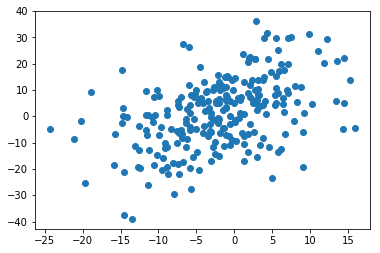

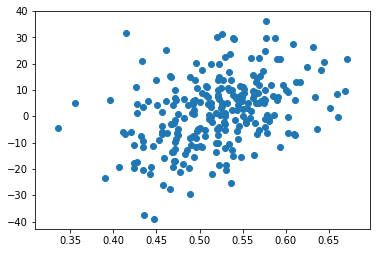

In [219]:
#Plots for reference

plt.figure(1)
plt.scatter(dfLineup['CHEM'],dfLineup['PLUS_MINUS'])

plt.figure(2)
plt.scatter(dfLineup['SUM_PIE'],dfLineup['PLUS_MINUS'])